# Word Clouds from multiple news source

In [1]:
!pip install newsapi-python

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from datetime import *

In [5]:
from newsapi import NewsApiClient

In [6]:
newsapi = NewsApiClient(api_key='5f921c126ca94bfc8afd8accaf02bef9')

In [7]:
sources = newsapi.get_sources()

In [8]:
sources_list = []

In [12]:
sources = newsapi.get_sources()
sources_list = []
for source in sources['sources']:
    sources_list.append(source['id'])
    print(len(sources_list))
    sources_list

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128


In [13]:
print(len(sources_list))
sources_list

128


['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'argaam',
 'ars-technica',
 'ary-news',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bild',
 'blasting-news-br',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'crypto-coins-news',
 'der-tagesspiegel',
 'die-zeit',
 'el-mundo',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'focus',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'gruenderszene',
 'hacker-news',
 'handelsblatt',
 'ign',
 'il-sole-24-ore',
 'independent',
 'infobae',
 '

In [14]:
n_days = 30
query = 'data science'
page = 1
page_size = 100

def get_response_json(query, n_days, source, page_size, page):
    response_json = newsapi.get_everything(q=query,
                                            language='en',
                                            from_param=str(date.today() - timedelta(days=n_days)),
                                            to= str(date.today()),
                                            sources = source,
                                            page_size=page_size,
                                            page = page,
                                            sort_by='relevancy')
    return response_json
  
results = []

for i in range(50):
    results.append(get_response_json(query, n_days, sources_list[i], page_size, page))

NewsAPIException: {'status': 'error', 'code': 'rateLimited', 'message': 'You have made too many requests recently. Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours). Please upgrade to a paid plan if you need more requests.'}

<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-15-1bee1bb20bae>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if text_combined is not '':


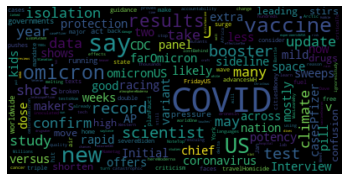

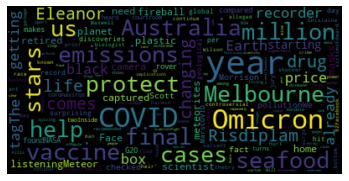

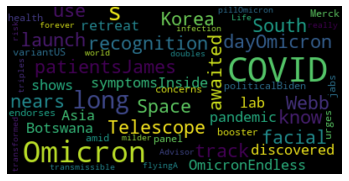

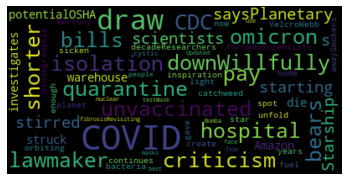

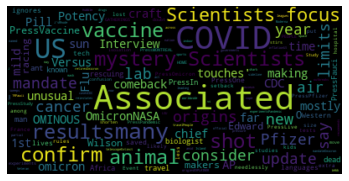

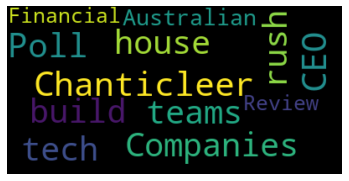

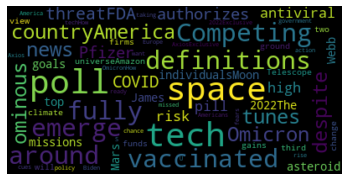

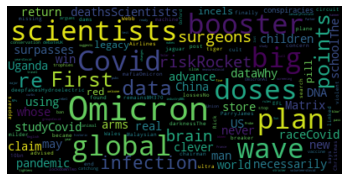

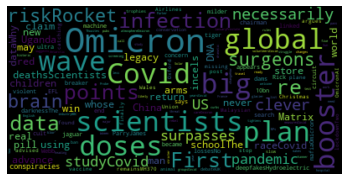

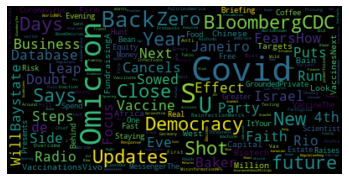

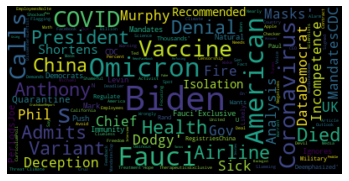

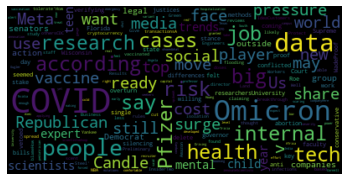

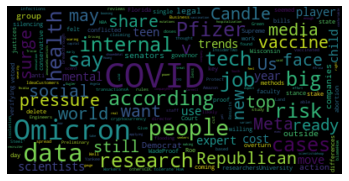

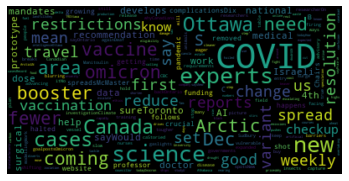

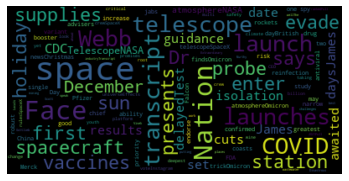

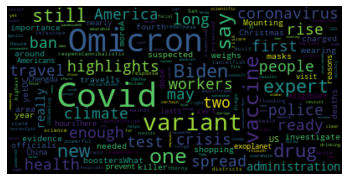

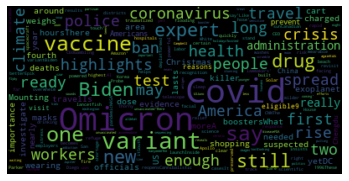

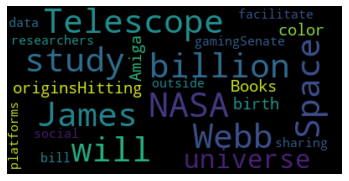

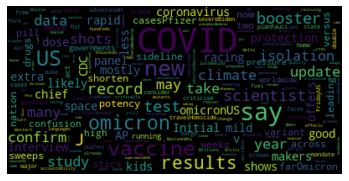

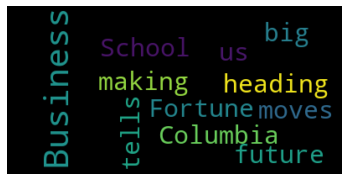

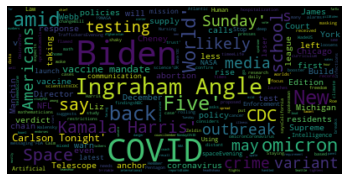

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(len(results)):
    text_combined = ''
    for j in results[i]['articles']:
        text_combined += j['title'] + ''
    
    if text_combined is not '':
        wordcloud = WordCloud(max_font_size=40).generate(text_combined)
        plt.figure()
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()